# Insurance Claim Fraud Detection

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [121]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [122]:
df.shape

(1000, 40)

In [123]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [124]:
df=df.drop(['_c39','policy_bind_date','policy_state','policy_number','insured_zip','incident_location','incident_date','incident_city','incident_state','auto_make','insured_hobbies','authorities_contacted','auto_model','auto_year'],axis=1)

In [125]:
df.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  number_of_vehicles_involved  \
0       craft-repair              husband  ...                            1   
1  machine-op-inspct       other-relative  ...                            1   
2              sales            own-child  ...                            3   
3       armed-forces            unmarried  ...                            1   
4              sales            unmarried  ...                            1   

   property_damage bodily_injuries witnesses police_report_available  \
0              YES               1         2                     YES   
1                ?               0         0                       ?   
2               NO               2         3                      NO   
3                ?               1         2                      NO   
4               NO               0         1                      NO   

   total_claim_amount  injury_claim property_claim  vehicle_claim  \
0               71610          6510          13020          52080   
1                5070           780            780           3510   
2               34650          7700           3850          23100   
3               63400          6340           6340          50720   
4                6500          1300            650           4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 26 columns]

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [127]:
df = df.replace('?', pd.NA)  
df = df.apply(lambda x: x.fillna(x.mode()[0]))

df

months_as_customer  age policy_csl  policy_deductable  \
0                   328   48    250/500               1000   
1                   228   42    250/500               2000   
2                   134   29    100/300               2000   
3                   256   41    250/500               2000   
4                   228   44   500/1000               1000   
..                  ...  ...        ...                ...   
995                   3   38   500/1000               1000   
996                 285   41    100/300               1000   
997                 130   34    250/500                500   
998                 458   62   500/1000               2000   
999                 456   60    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation insured_relationship  ...  \
0                        MD       craft-repair              husband  ...   
1                        MD  machine-op-inspct       other-relative  ...   
2                       PhD              sales            own-child  ...   
3                       PhD       armed-forces            unmarried  ...   
4                 Associate              sales            unmarried  ...   
..                      ...                ...                  ...  ...   
995                 Masters       craft-repair            unmarried  ...   
996                     PhD     prof-specialty                 wife  ...   
997                 Masters       armed-forces       other-relative  ...   
998               Associate  handlers-cleaners                 wife  ...   
999               Associate              sales              husband  ...   

     number_of_vehicles_involved  property_damage bodily_injuries witnesses  \
0                              1              YES               1         2   
1                              1               NO               0         0   
2                              3               NO               2         3   
3                              1               NO               1         2   
4                              1               NO               0         1   
..                           ...              ...             ...       ...   
995                            1              YES               0         1   
996                            1              YES               2         3   
997                            3               NO               2         3   
998                            1               NO               0         1   
999                            1               NO               0         3   

    police_report_available  total_claim_amount  injury_claim property_claim  \
0                       YES               71610          6510          13020   
1                        NO                5070           780            780   
2                        NO               34650          7700           3850   
3                        NO               63400          6340           6340   
4                        NO                6500          1300            650   
..                      ...                 ...           ...            ...   
995                      NO               87200         17440           8720   
996                      NO              108480         18080

<Axes: xlabel='fraud_reported', ylabel='count'>

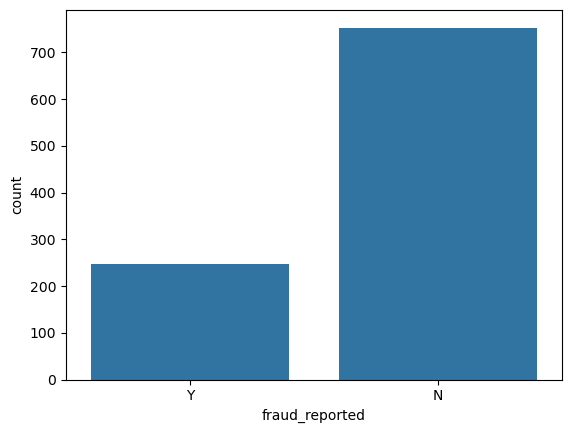

In [128]:
sns.countplot(x=df['fraud_reported'],data=df)

<Axes: xlabel='insured_education_level', ylabel='count'>

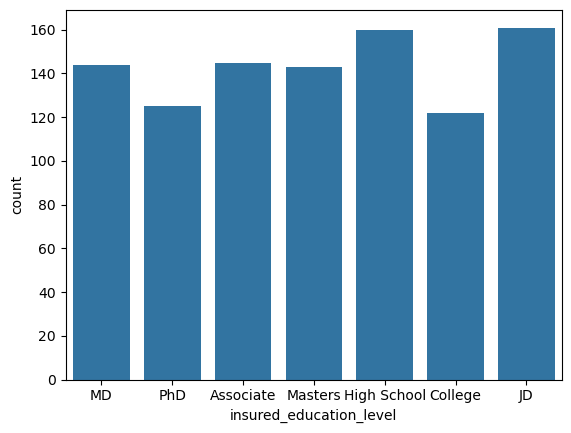

In [129]:
sns.countplot(x=df['insured_education_level'],data=df)

<Axes: xlabel='col_0', ylabel='fraud_reported'>

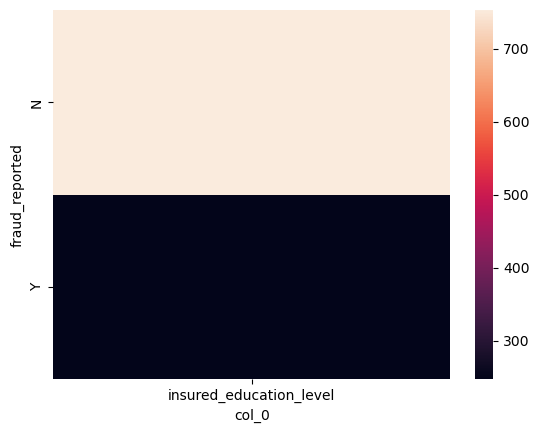

In [130]:
sns.heatmap(pd.crosstab(df['fraud_reported'],['insured_education_level']))

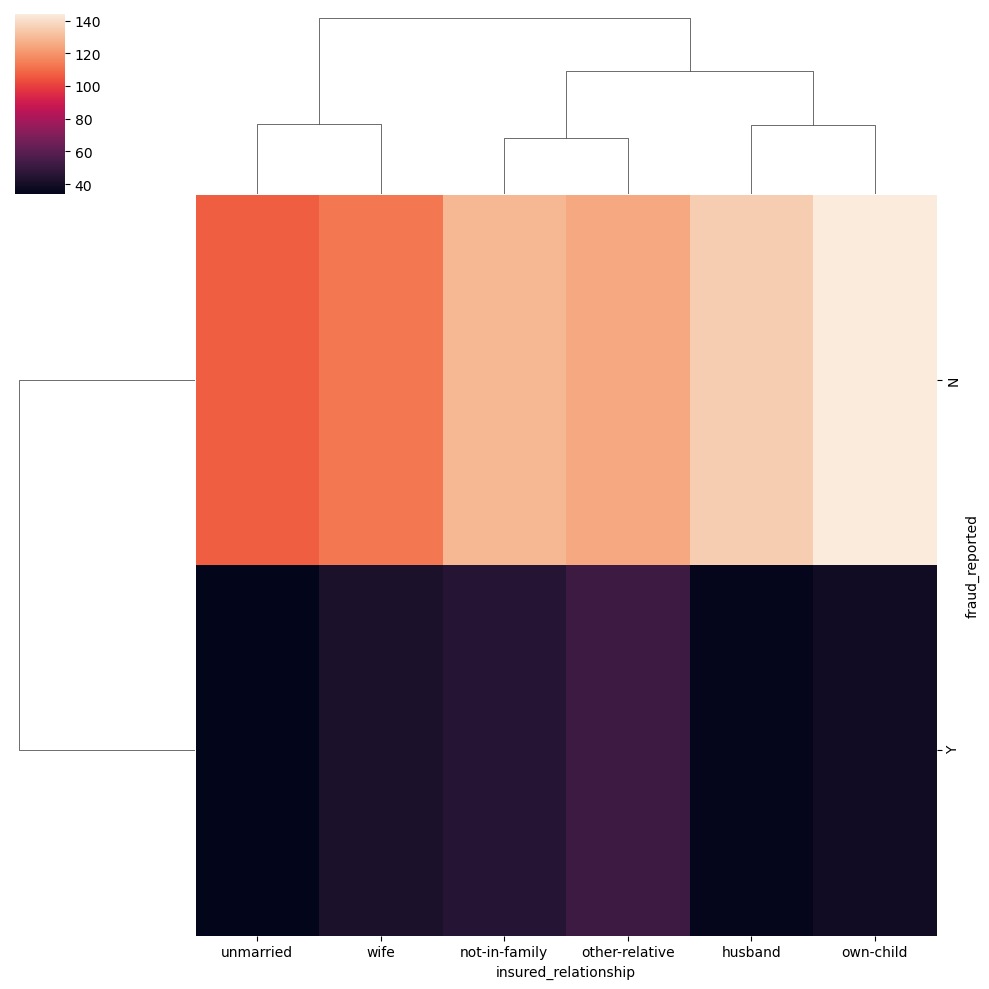

In [131]:
sns.clustermap(pd.crosstab(df['fraud_reported'], df['insured_relationship']))
plt.show()

<Axes: ylabel='fraud_reported'>

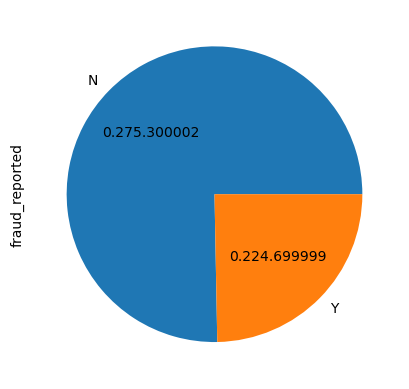

In [132]:
df['fraud_reported'].value_counts().plot(kind='pie',autopct='0.2%f')

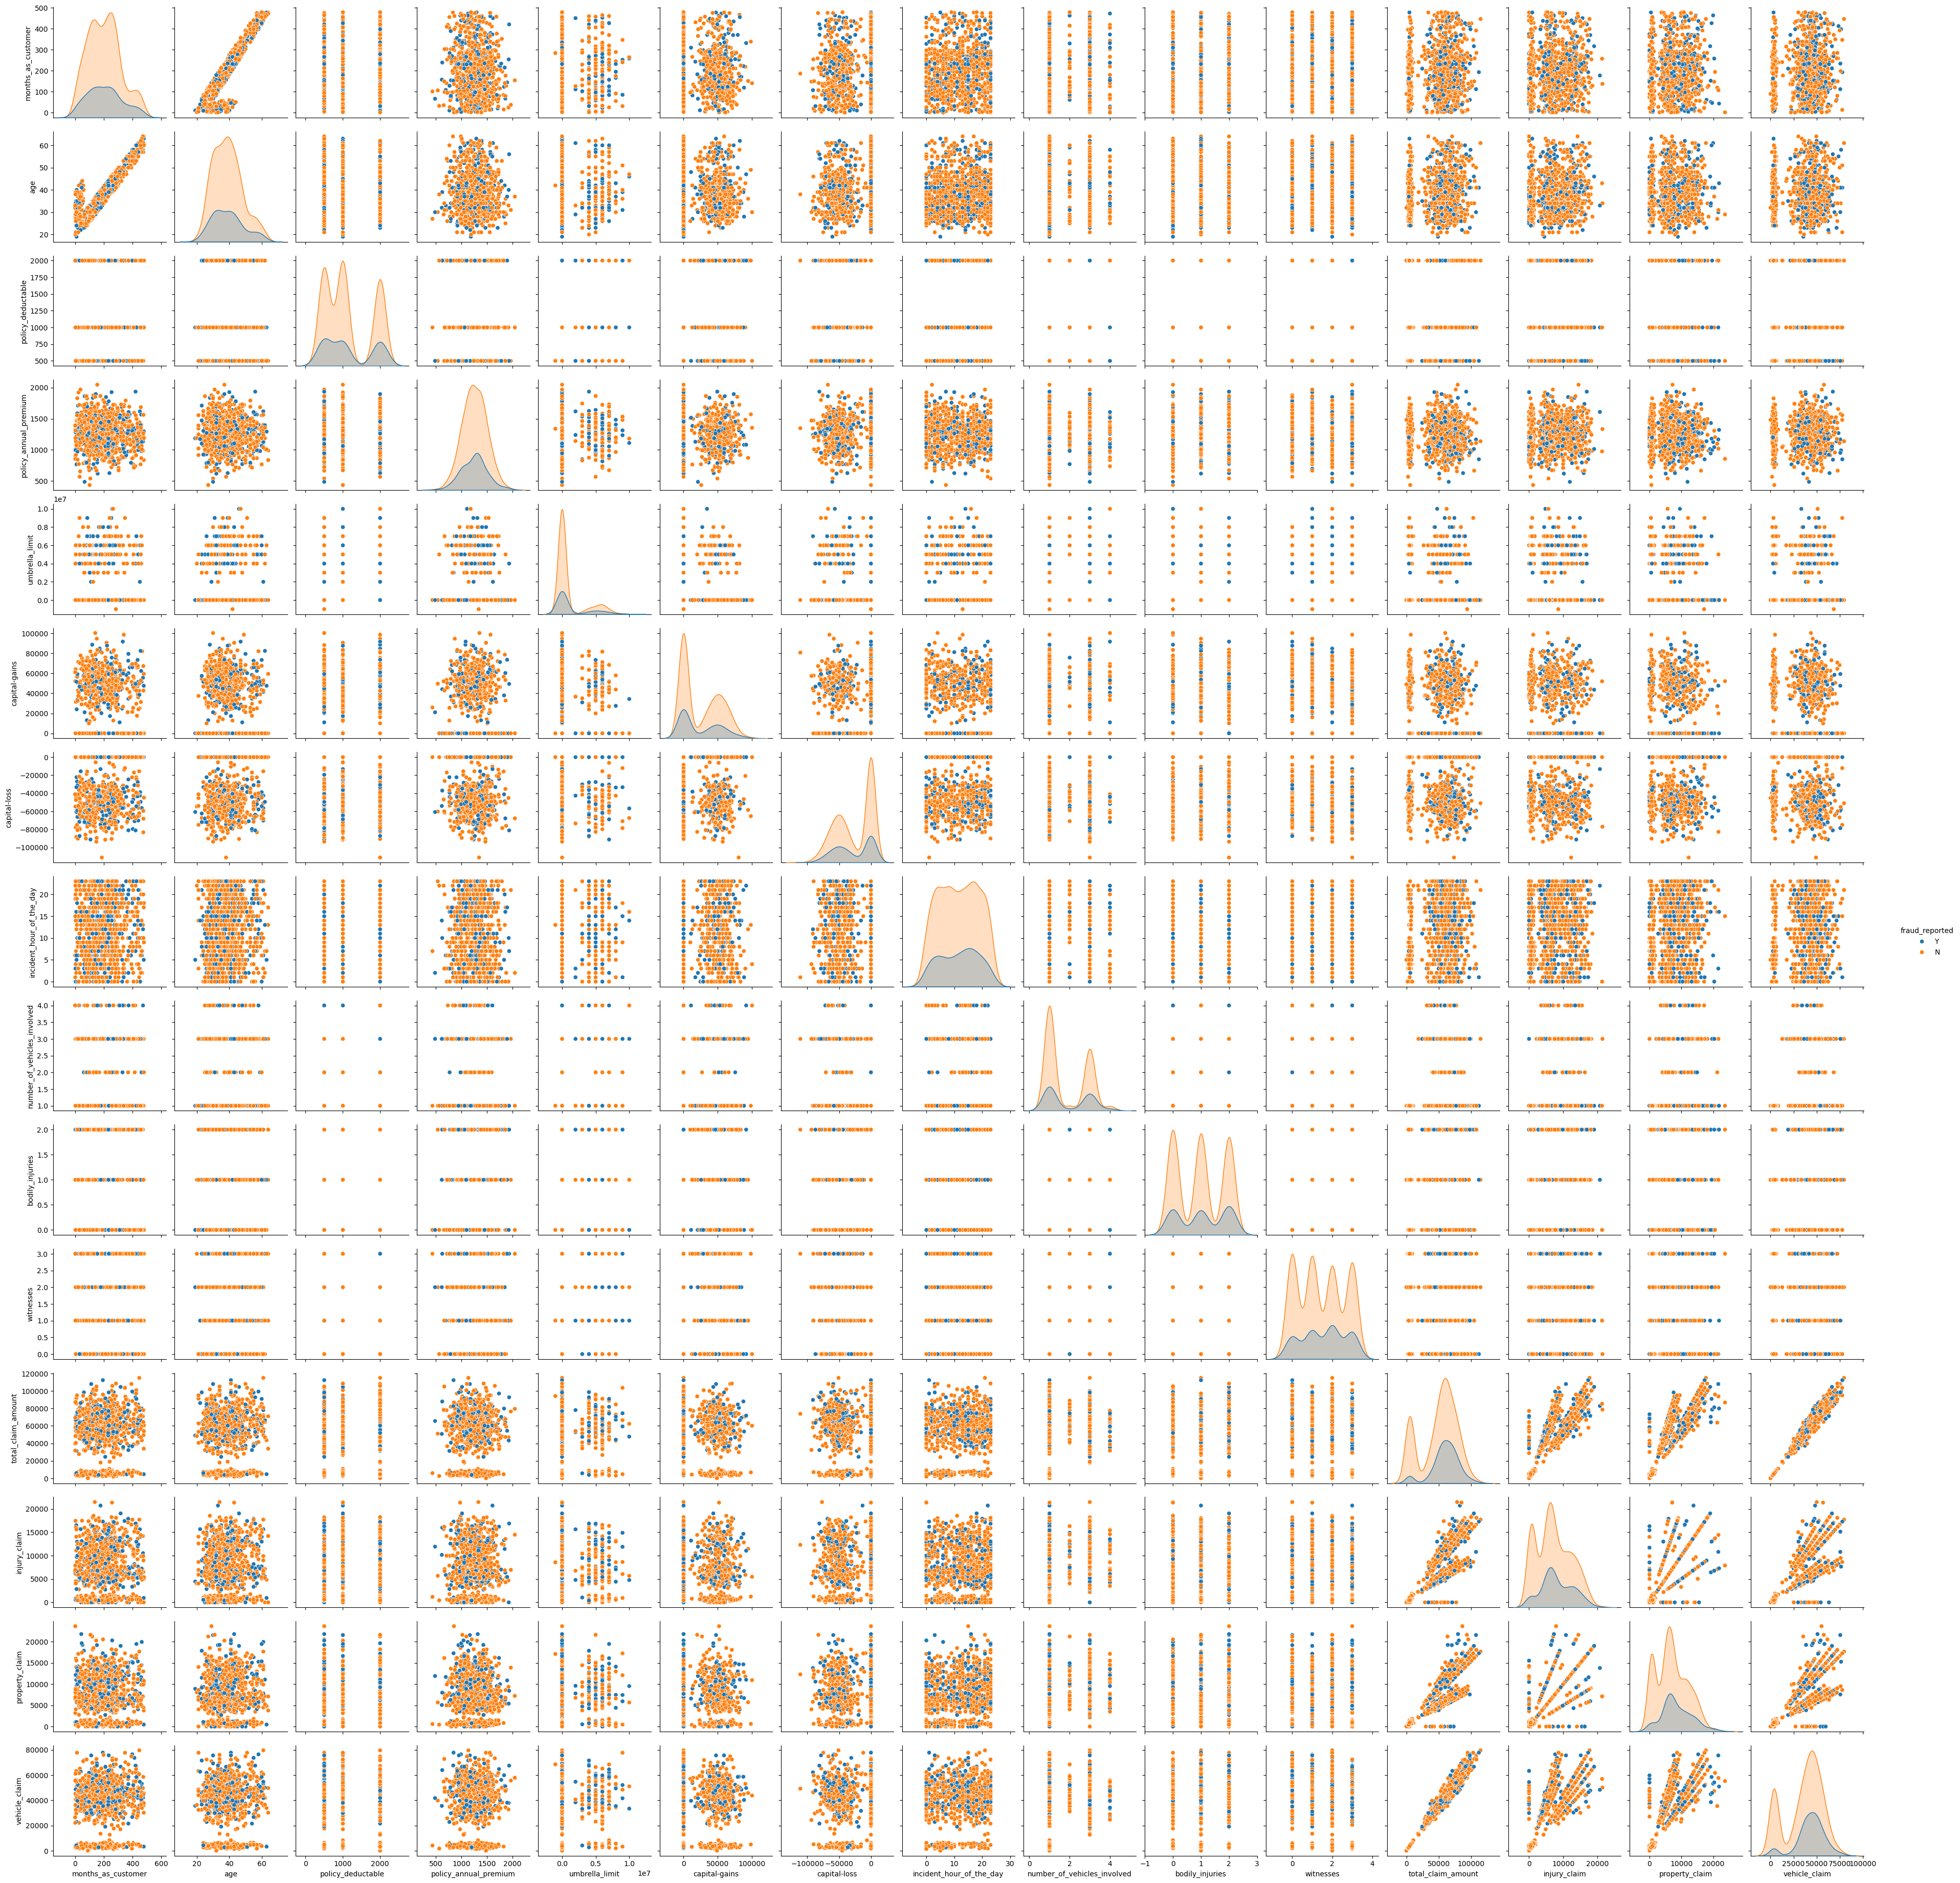

In [94]:
sns.pairplot((df),hue='fraud_reported')

<Axes: xlabel='insured_sex', ylabel='age'>

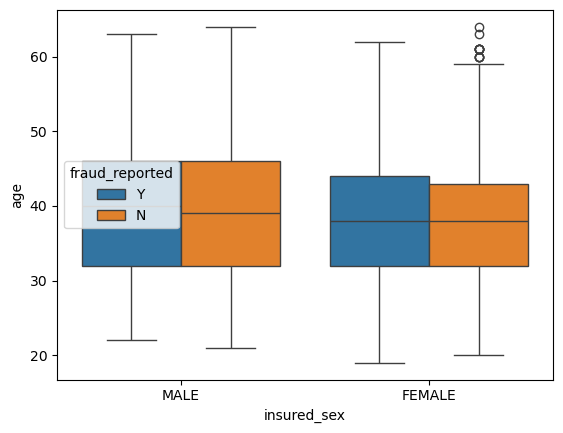

In [133]:
sns.boxplot(x=df['insured_sex'],y=df['age'],hue=df['fraud_reported'],data=df)

In [134]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [135]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [136]:
df['policy_csl']=df['policy_csl'].map({'250/500':1,'100/300':2,'500/1000':3})
df['insured_sex']=df['insured_sex'].map({'MALE':1,'FEMALE':2})
df['insured_education_level']=df['insured_education_level'].map({'MD':1, 'PhD':2, 'Associate':3, 'Masters':4, 'High School':5, 'College':6,'JD':7})
df['insured_occupation']=df['insured_occupation'].map({'craft-repair':1, 'machine-op-inspct':2, 'sales':3, 'armed-forces':4,'tech-support':5, 'prof-specialty':6, 'other-service':7,'priv-house-serv':8, 'exec-managerial':9, 'protective-serv':10,'transport-moving':11, 'handlers-cleaners':12, 'adm-clerical':13,'farming-fishing':14})
df['insured_relationship']=df['insured_relationship'].map({'husband':1, 'other-relative':2, 'own-child':3, 'unmarried':4, 'wife':5,'not-in-family':6})
df['incident_type']=df['incident_type'].map({'Single Vehicle Collision':1, 'Vehicle Theft':2,'Multi-vehicle Collision':3, 'Parked Car':4})
df['collision_type']=df['collision_type'].map({'Side Collision':1, 'Rear Collision':2, 'Front Collision':3})
df['incident_severity']=df['incident_severity'].map({'Major Damage':1, 'Minor Damage':2, 'Total Loss':3, 'Trivial Damage':4})
df['property_damage']=df['property_damage'].map({'YES':1, 'NO':0})
df['police_report_available']=df['police_report_available'].map({'NO':0,'YES':1})


In [137]:
df.head()

months_as_customer  age  policy_csl  policy_deductable  \
0                 328   48           1               1000   
1                 228   42           1               2000   
2                 134   29           2               2000   
3                 256   41           1               2000   
4                 228   44           3               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            2   
3                1415.74         6000000            2   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_relationship  ...  \
0                        1                   1                     1  ...   
1                        1                   2                     2  ...   
2                        2                   3                     3  ...   
3                        2                   4                     4  ...   
4                        3                   3                     4  ...   

   number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                            1                1                1          2   
1                            1                0                0          0   
2                            3                0                2          3   
3                            1                0                1          2   
4                            1                0                0          1   

   police_report_available  total_claim_amount  injury_claim  property_claim  \
0                        1               71610          6510           13020   
1                        0                5070           780             780   
2                        0               34650          7700            3850   
3                        0               63400          6340            6340   
4                        0                6500          1300             650   

   vehicle_claim  fraud_reported  
0          52080               1  
1           3510               1  
2          23100               0  
3          50720               1  
4           4550               0  

[5 rows x 26 columns]

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int64  
 7   insured_education_level      1000 non-null   int64  
 8   insured_occupation           1000 non-null   int64  
 9   insured_relationship         1000 non-null   int64  
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   int64  
 13  collision_type     

In [139]:
df.describe()

months_as_customer          age   policy_csl  policy_deductable  \
count         1000.000000  1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000     1.949000        1136.000000   
std            115.113174     9.140287     0.805635         611.864673   
min              0.000000    19.000000     1.000000         500.000000   
25%            115.750000    32.000000     1.000000         500.000000   
50%            199.500000    38.000000     2.000000        1000.000000   
75%            276.250000    44.000000     3.000000        2000.000000   
max            479.000000    64.000000     3.000000        2000.000000   

       policy_annual_premium  umbrella_limit  insured_sex  \
count            1000.000000    1.000000e+03  1000.000000   
mean             1256.406150    1.101000e+06     1.537000   
std               244.167395    2.297407e+06     0.498879   
min               433.330000   -1.000000e+06     1.000000   
25%              1089.607500    0.000000e+00     1.000000   
50%              1257.200000    0.000000e+00     2.000000   
75%              1415.695000    0.000000e+00     2.000000   
max              2047.590000    1.000000e+07     2.000000   

       insured_education_level  insured_occupation  insured_relationship  ...  \
count              1000.000000         1000.000000            1000.00000  ...   
mean                  4.060000            7.070000               3.45600  ...   
std                   2.009587            3.951546               1.72599  ...   
min                   1.000000            1.000000               1.00000  ...   
25%                   2.000000            4.000000               2.00000  ...   
50%                   4.000000            7.000000               3.00000  ...   
75%                   6.000000           10.000000               5.00000  ...   
max                   7.000000           14.000000               6.00000  ...   

       number_of_vehicles_involved  property_damage  bodily_injuries  \
count                   1000.00000      1000.000000      1000.000000   
mean                       1.83900         0.302000         0.992000   
std                        1.01888         0.459355         0.820127   
min                        1.00000         0.000000         0.000000   
25%                        1.00000         0.000000         0.000000   
50%                        1.00000         0.000000         1.000000   
75%                        3.00000         1.000000         2.000000   
max                        4.00000         1.000000         2.000000   

         witnesses  police_report_available  total_claim_amount  injury_claim  \
count  1000.000000              1000.000000          1000.00000   1000.000000   
mean      1.487000                 0.314000         52761.94000   7433.420000   
std       1.111335                 0.464349         26401.53319   4880.951853   
min       0.000000                 0.000000           100.00000      0.000000   
25%       1.000000                 0.000000         41812.50000   4295.000000   
50%       1.000000                 0.000000         58055.00000   6775.000000   
75%       2.000000                 1.000000         70592.50000  11305.000000   
max       3.000000                 1.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim  fraud_reported  
count     1000.000000    1000.000000     1000.000000  
mean      7399.570000   37928.950000        0.247000  
std       4824.726179   18886.252893        0.431483  
min          0.000000      70.000000        0.000000  
25%       4445.000000   30292.500000        0.000000  
50%       6750.000000   42100.000000        0.000000  
75%      10885.000000   50822.500000        0.000000  
max      23670.000000   79560.000000        1.000000  

[8 rows x 26 columns]

In [140]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [141]:
# z sccore
from scipy.stats import zscore
out_features=df[['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']]
z=np.abs(zscore(out_features))    #
z

months_as_customer       age  policy_csl  policy_deductable  \
0              1.078140  0.990836    1.178542           0.222383   
1              0.208995  0.334073    1.178542           1.412784   
2              0.608002  1.088913    0.063336           1.412784   
3              0.452355  0.224613    1.178542           1.412784   
4              0.208995  0.552994    1.305213           0.222383   
..                  ...       ...         ...                ...   
995            1.746582  0.103769    1.305213           0.222383   
996            0.704407  0.224613    0.063336           0.222383   
997            0.642767  0.541611    1.178542           1.039966   
998            2.208028  2.523284    1.305213           1.412784   
999            2.190645  2.304363    1.178542           0.222383   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                 0.616705        0.479476     1.076953   
1                 0.242521        1.697980     1.076953   
2                 0.642233        1.697980     0.928546   
3                 0.652886        2.133471     0.928546   
4                 1.341980        2.133471     1.076953   
..                     ...             ...          ...   
995               0.222884        0.479476     0.928546   
996               0.739141        0.479476     0.928546   
997               0.520739        0.826998     0.928546   
998               0.411866        1.697980     1.076953   
999               2.008710        0.479476     0.928546   

     insured_education_level  insured_occupation  insured_relationship  ...  \
0                   1.523463            1.536876              1.423663  ...   
1                   1.523463            1.283684              0.843996  ...   
2                   1.025599            1.030492              0.264328  ...   
3                   1.025599            0.777300              0.315339  ...   
4                   0.527736            1.030492              0.315339  ...   
..                       ...                 ...                   ...  ...   
995                 0.029872            1.536876              0.315339  ...   
996                 1.025599            0.270916              0.895006  ...   
997                 0.029872            0.777300              0.843996  ...   
998                 0.527736            1.248237              0.895006  ...   
999                 0.527736            1.030492              1.423663  ...   

     number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  \
0                       0.823865         1.520282         0.009759   0.461838   
1                       0.823865         0.657773         1.210174   1.338700   
2                       1.140056         0.657773         1.229693   1.362107   
3                       0.823865         0.657773         0.009759   0.461838   
4                       0.823865         0.657773         1.210174   0.438431   
..                           ...              ...              ...        ...   
995                     0.823865         1.520282         1.210174   0.438431   
996                     0.823865         1.520282         1.229693   1.362107   
997                     1.140056         0.657773         1.229693   1.362107   
998                     0.823865         0.657773         1.210174   0.438431   
999                     0.823865         0.657773         1.210174   1.362107   

     police_report_available  total_claim_amount  injury_claim  \
0                   1.478078            0.714257      0.189283   
1                   0.676554            1.807312      1.363822   
2                   0.676554            0.686362      0.054644   
3                   0.676554            0.403135      0.224130   
4                   0.676554            1.753121      1.257232   
..                       ...                 ...           ...   
995                 0.676554            1.305049      2.051155   
996                 0.676554 

In [142]:
np.where(z<3)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64),
 array([ 0,  1,  2, ..., 23, 24, 25], dtype=int64))

In [143]:
df1=df[(z<3).all(axis=1)]
df1.shape

(980, 26)

In [144]:
print("old dataframe: ",df.shape[0])
print("new dataframe: ",df1.shape[0])

old dataframe:  1000
new dataframe:  980


In [145]:
print("data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage: 2.0


In [146]:
df1.corr()

months_as_customer       age  policy_csl  \
months_as_customer                     1.000000  0.922960   -0.007121   
age                                    0.922960  1.000000   -0.011258   
policy_csl                            -0.007121 -0.011258    1.000000   
policy_deductable                      0.031041  0.032036    0.014554   
policy_annual_premium                 -0.003814  0.005330    0.001868   
umbrella_limit                         0.018213  0.013256   -0.025418   
insured_sex                           -0.059644 -0.073790    0.071995   
insured_education_level               -0.073327 -0.075177   -0.041210   
insured_occupation                    -0.001206  0.002757    0.017840   
insured_relationship                   0.036408  0.057997   -0.005928   
capital-gains                          0.007468 -0.004529    0.004870   
capital-loss                           0.023041  0.012860   -0.010440   
incident_type                         -0.009927 -0.002869    0.002461   
collision_type                         0.073031  0.076325   -0.017626   
incident_severity                     -0.064094 -0.064396   -0.011673   
incident_hour_of_the_day               0.066198  0.083720   -0.006180   
number_of_vehicles_involved            0.011831  0.020391    0.004455   
property_damage                       -0.000630 -0.008239   -0.006881   
bodily_injuries                       -0.007674 -0.012254    0.020053   
witnesses                              0.063574  0.056360    0.012073   
police_report_available               -0.017200 -0.018135   -0.065395   
total_claim_amount                     0.058761  0.067812    0.019409   
injury_claim                           0.065062  0.077149   -0.000055   
property_claim                         0.036660  0.062375    0.015800   
vehicle_claim                          0.055941  0.058918    0.023125   
fraud_reported                         0.021285  0.013279   -0.042864   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_csl                            0.014554               0.001868   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                           0.006977              -0.041312   
insured_education_level              -0.071774              -0.002247   
insured_occupation                    0.029343               0.032169   
insured_relationship                 -0.012698              -0.006707   
capital-gains                         0.031673              -0.006807   
capital-loss                         -0.019601               0.033133   
incident_type                         0.028525              -0.058153   
collision_type                        0.055984              -0.032604   
incident_severity                    -0.016363              -0.013911   
incident_hour_of_the_day              0.064732              -0.006448   
number_of_vehicles_involved           0.046331              -0.044544   
property_damage                       0.013074               0.076447   
bodily_injuries                      -0.037263               0.027837   
witnesses                             0.071709               0.003433   
police_report_available               0.036275               0.032413   
total_claim_amount                    0.023835              -0.000223   
injury_claim                          0.038459              -0.024119   
property_claim                        0.071031              -0.014073   
vehicle_claim                         0.005279               0.009521   
fraud_reported                        0.015774              -0.012686   

                             umbrella_limit  insured_sex  \
months_as_customer       

<Axes: >

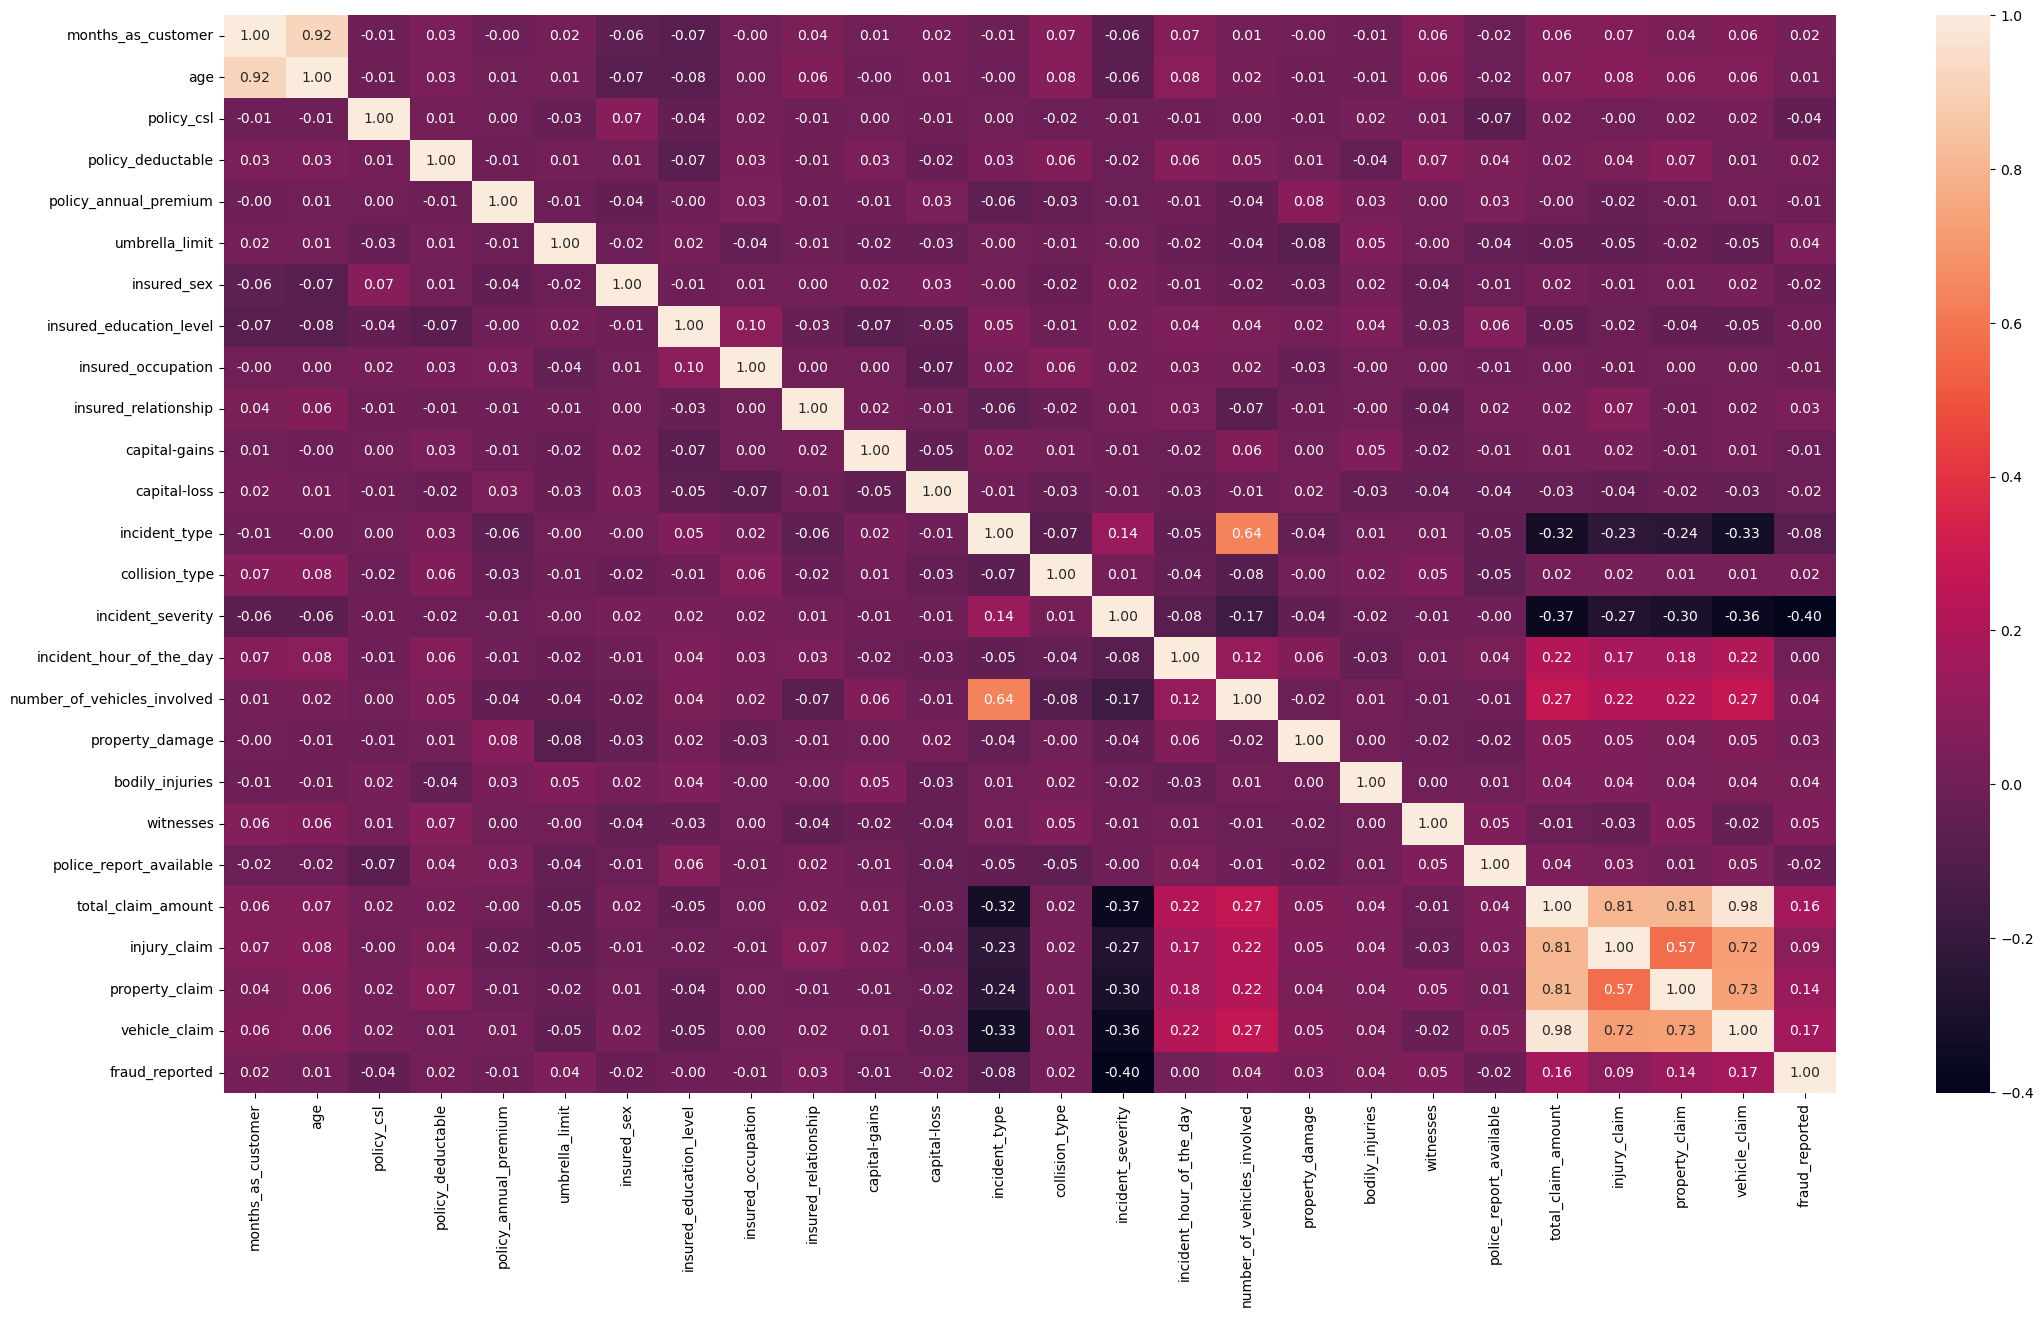

In [147]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f')

In [148]:
df.corr().fraud_reported.sort_values()

incident_severity             -0.405988
incident_type                 -0.070963
policy_csl                    -0.041475
insured_sex                   -0.030873
police_report_available       -0.027768
capital-gains                 -0.019173
insured_occupation            -0.017196
capital-loss                  -0.014863
policy_annual_premium         -0.014480
insured_education_level       -0.003255
incident_hour_of_the_day       0.004316
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
collision_type                 0.017315
months_as_customer             0.020544
insured_relationship           0.024689
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
property_claim                 0.137835
total_claim_amount             0.163651
vehicle_claim                  0.170049


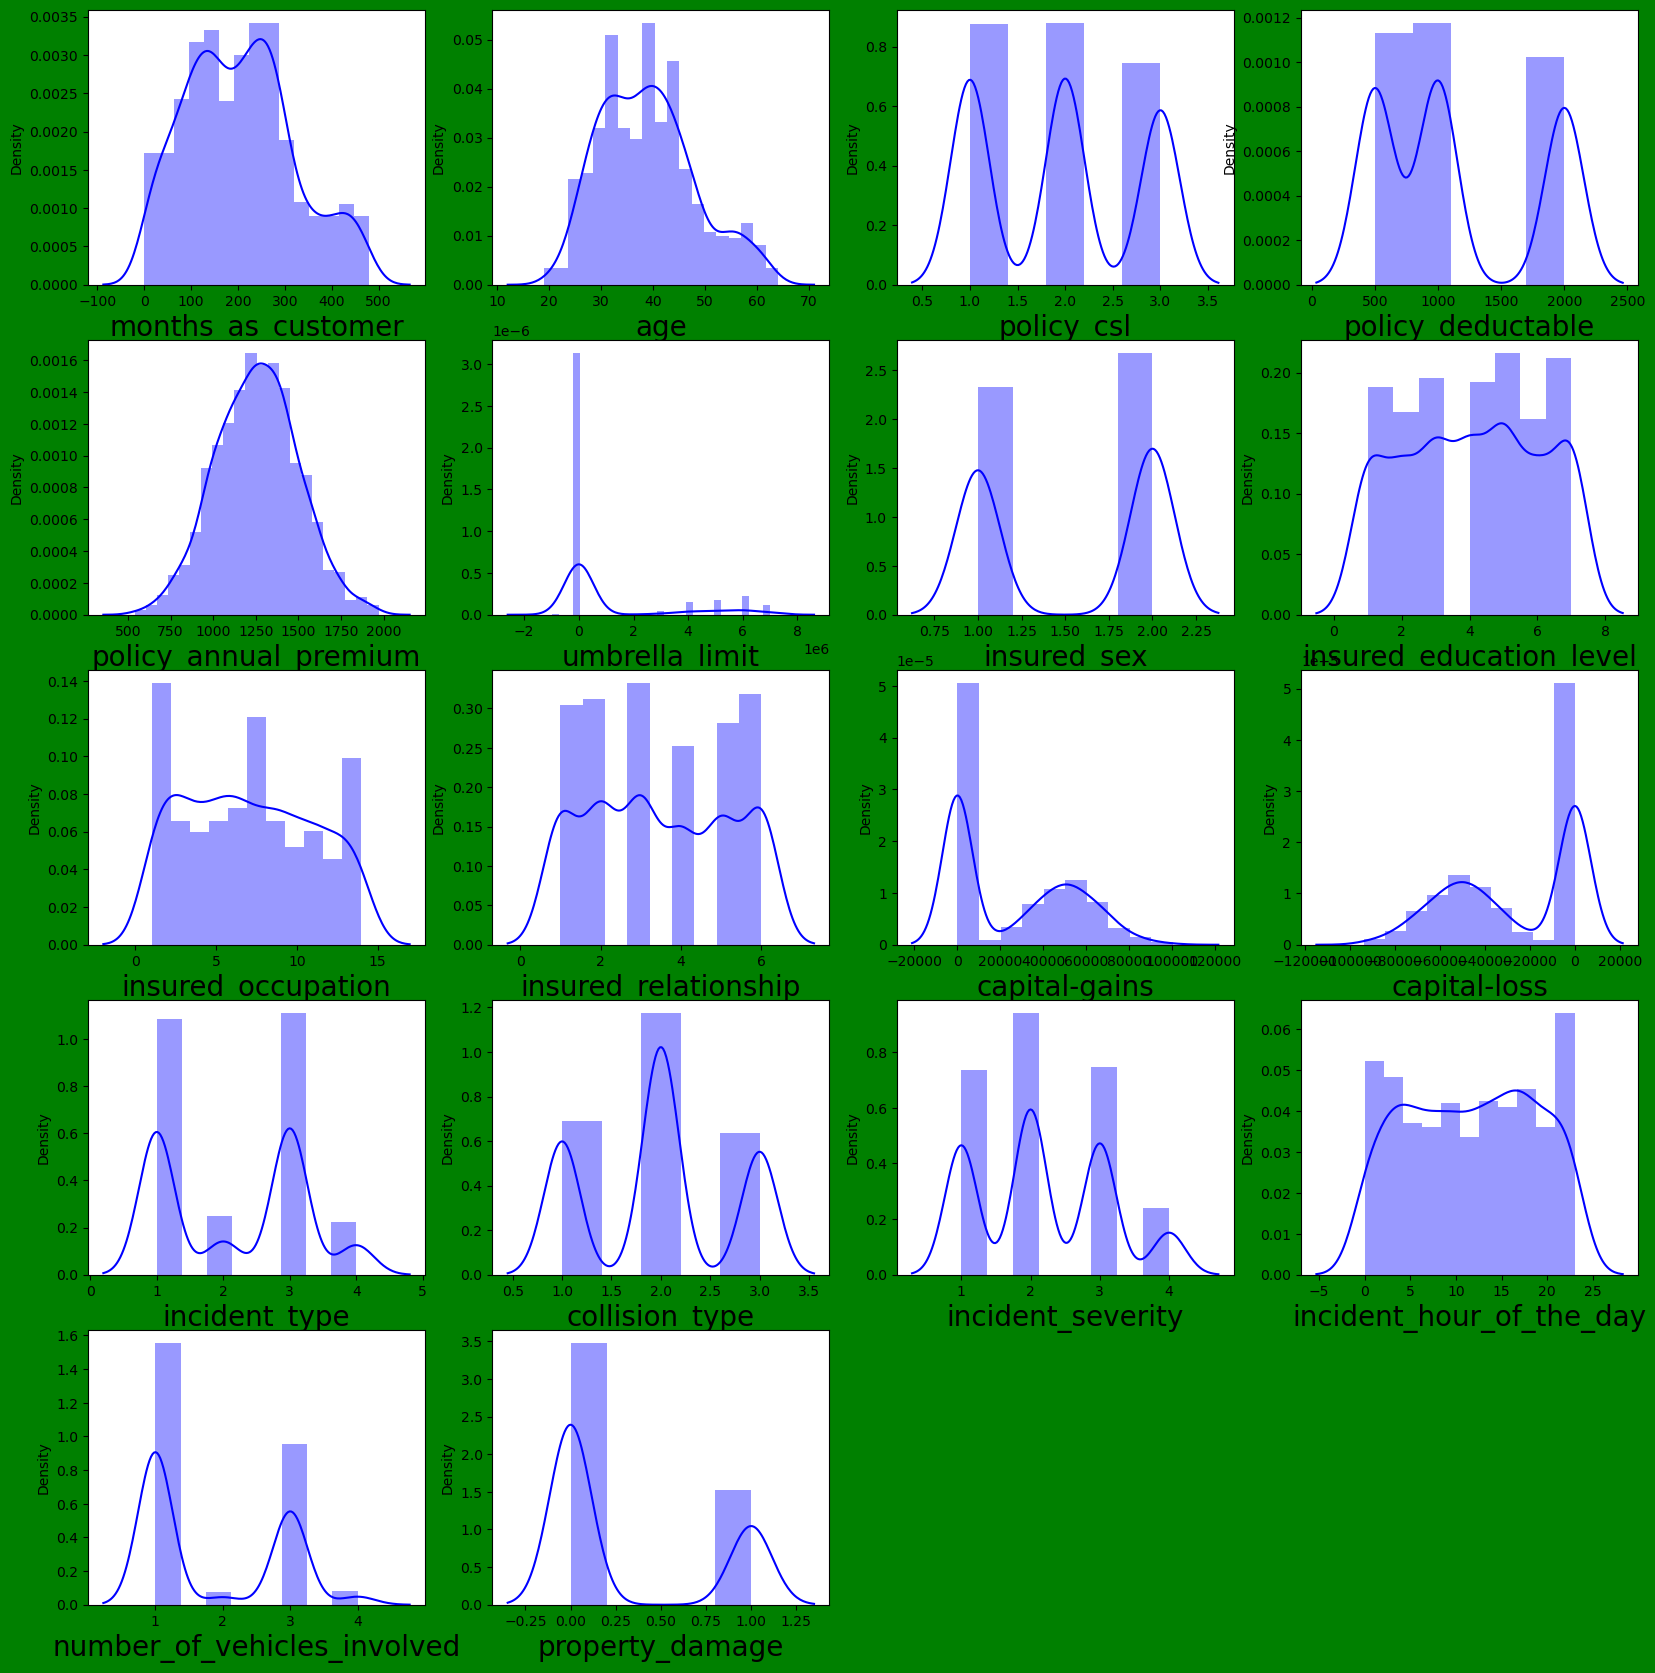

In [149]:
# checking the skewness of the data
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [150]:
 # Feturing the x and y
x=df1.drop(['fraud_reported'],axis=1)
y=df1['fraud_reported']
print("feature dimensions",x.shape)
print("label dimension",y.shape)

feature dimensions (980, 25)
label dimension (980,)


In [151]:
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

VIF values                     Features
0    22.621631           months_as_customer
1    91.728723                          age
2     6.722857                   policy_csl
3     4.558052            policy_deductable
4    22.972515        policy_annual_premium
5     1.237935               umbrella_limit
6     9.814260                  insured_sex
7     5.161618      insured_education_level
8     4.303441           insured_occupation
9     5.060766         insured_relationship
10    1.843996                capital-gains
11    1.954110                 capital-loss
12   15.778057                incident_type
13    8.275710               collision_type
14    7.124851            incident_severity
15    4.115074     incident_hour_of_the_day
16   13.109477  number_of_vehicles_involved
17    1.470695              property_damage
18    2.524756              bodily_injuries
19    2.830772                    witnesses
20    1.497756      police_report_available
21         inf           total_claim_amount
22         inf                 injury_claim
23         inf               property_claim
24         inf                vehicle_claim

In [152]:
#modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [153]:
# finding the best random state
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   # to find difference between the predicted and actual value
    if acc>maxacc: 
        maxacc=acc
        maxrs=i
print("Maximum score is",maxacc,"on Random state",maxrs)

Maximum score is 0.30185787157199473 on Random state 73


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxrs)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [156]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_LR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error',mean_squared_error(y_test,pred_LR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score:  0.20051960004233316
R2 score on training data:  16.43207326606576
Mean Absolute Error 0.3140701403342533
Mean Squared Error 0.14616406345914928
Root mean squared Error 0.38231409006097233


In [157]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_RFR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error',mean_squared_error(y_test,pred_RFR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.19396250227811196
R2 score on training data:  88.8801508865708
Mean Absolute Error 0.29293877551020414
Mean Squared Error 0.14736285714285713
Root mean squared Error 0.38387870107998584


In [158]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error',mean_squared_error(y_test,pred_knn))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  -0.15467468562055786
R2 score on training data:  26.87675768394596
Mean Absolute Error 0.3485714285714286
Mean Squared Error 0.21110204081632652
Root mean squared Error 0.4594584212051473


In [159]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_GBR))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error',mean_squared_error(y_test,pred_GBR))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score:  0.17159565246942798
R2 score on training data:  63.76150253618806
Mean Absolute Error 0.28938168926739
Mean Squared Error 0.15145205014244892
Root mean squared Error 0.38916840845892015


In [160]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error',mean_squared_error(y_test,pred_ls))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 score:  0.01080997807234596
R2 score on training data:  3.9987914537837788
Mean Absolute Error 0.3578396670369529
Mean Squared Error 0.18084750188478257
Root mean squared Error 0.42526168635886136


In [161]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error',mean_squared_error(y_test,pred_rd))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score:  0.2003644506338944
R2 score on training data:  16.432033699921632
Mean Absolute Error 0.3141261668188659
Mean Squared Error 0.14619242846719938
Root mean squared Error 0.3823511847336155


In [162]:
from sklearn.tree import DecisionTreeRegressor 

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_dtr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error',mean_squared_error(y_test,pred_dtr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  -0.7637142336431566
R2 score on training data:  100.0
Mean Absolute Error 0.3224489795918367
Mean Squared Error 0.3224489795918367
Root mean squared Error 0.5678459118386225


In [163]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
pred_svr=dtr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_svr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error',mean_squared_error(y_test,pred_svr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  -0.7637142336431566
R2 score on training data:  -11.281392932765865
Mean Absolute Error 0.3224489795918367
Mean Squared Error 0.3224489795918367
Root mean squared Error 0.5678459118386225


In [164]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error',mean_squared_error(y_test,pred_etr))
print('Root mean squared Error',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 score:  0.2008320575906688
R2 score on training data:  100.0
Mean Absolute Error 0.290530612244898
Mean Squared Error 0.1461069387755102
Root mean squared Error 0.5678459118386225


In [165]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score =cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.17329482 0.12062684 0.02891755 0.08278373 0.2048798 ]
0.12210054854628719
Difference between R2 score and cross validation score:  7.841905149604597


In [166]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[ 0.24896752  0.12553418 -0.00407799  0.18314296  0.2576757 ]
0.1622484725843476
Difference between R2 score and cross validation score:  3.1714029693764356


In [167]:
 score2 =cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.1689141  -0.18080206 -0.23906699 -0.14571302 -0.11897857]
-0.17069494920963044
Difference between R2 score and cross validation score:  1.6020263589072576


In [168]:
score3 =cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.2129828  0.12195672 0.00109381 0.16161522 0.24605357]
0.14874042382006064
Difference between R2 score and cross validation score:  4.94951039231408


In [169]:
score4 =cross_val_score(ls,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_ls)-score4.mean())*100)

[ 0.06459467 -0.03646439 -0.04624643  0.03514179  0.03146114]
0.009697358201592232
Difference between R2 score and cross validation score:  0.11126198707537283


In [170]:
score5 =cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_rd)-score5.mean())*100)

[0.17337674 0.12062008 0.02900235 0.08296062 0.20485779]
0.12216351471237745
Difference between R2 score and cross validation score:  7.820093592151696


In [171]:
score6 =cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-0.44821217 -0.54171502 -0.81698565 -0.99028698 -0.7875057 ]
-0.7169411018728475
Difference between R2 score and cross validation score:  -4.677313177030906


In [172]:
score7 =cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_svr)-score7.mean())*100)

[-0.14698197 -0.16152805 -0.0892598  -0.09488043 -0.0833812 ]
-0.11520628876615366
Difference between R2 score and cross validation score:  -64.8507944877003


In [173]:
score8 =cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score: ",(r2_score(y_test,pred_etr)-score8.mean())*100)

[ 0.22048687  0.08788601 -0.02190789  0.1594672   0.24228527]
0.137643490738872
Difference between R2 score and cross validation score:  6.31885668517968


In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
# Hyper Parameter Tunning
from sklearn.tree import DecisionTreeRegressor

param = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [1, 4, 10, 20]
}

# Assuming x_train and y_train are defined

gscv = GridSearchCV(DecisionTreeRegressor(), param, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [1, 4, 10, 20]})

In [176]:
gscv.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'random_state': 20}

In [177]:
Model = DecisionTreeRegressor(max_depth=10,
                               min_samples_split=2,  
                               min_samples_leaf=1,
                               max_features='auto', 
                               random_state=1) 

In [178]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('r2_score: ',r2_score(y_test,pred))
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))      

r2_score:  -0.5345402208559664
Mean Absolute error: 0.2976170657803311
Mean Squared error: 0.2805505103485777
Root Mean Squared Error:  0.529670190164198
